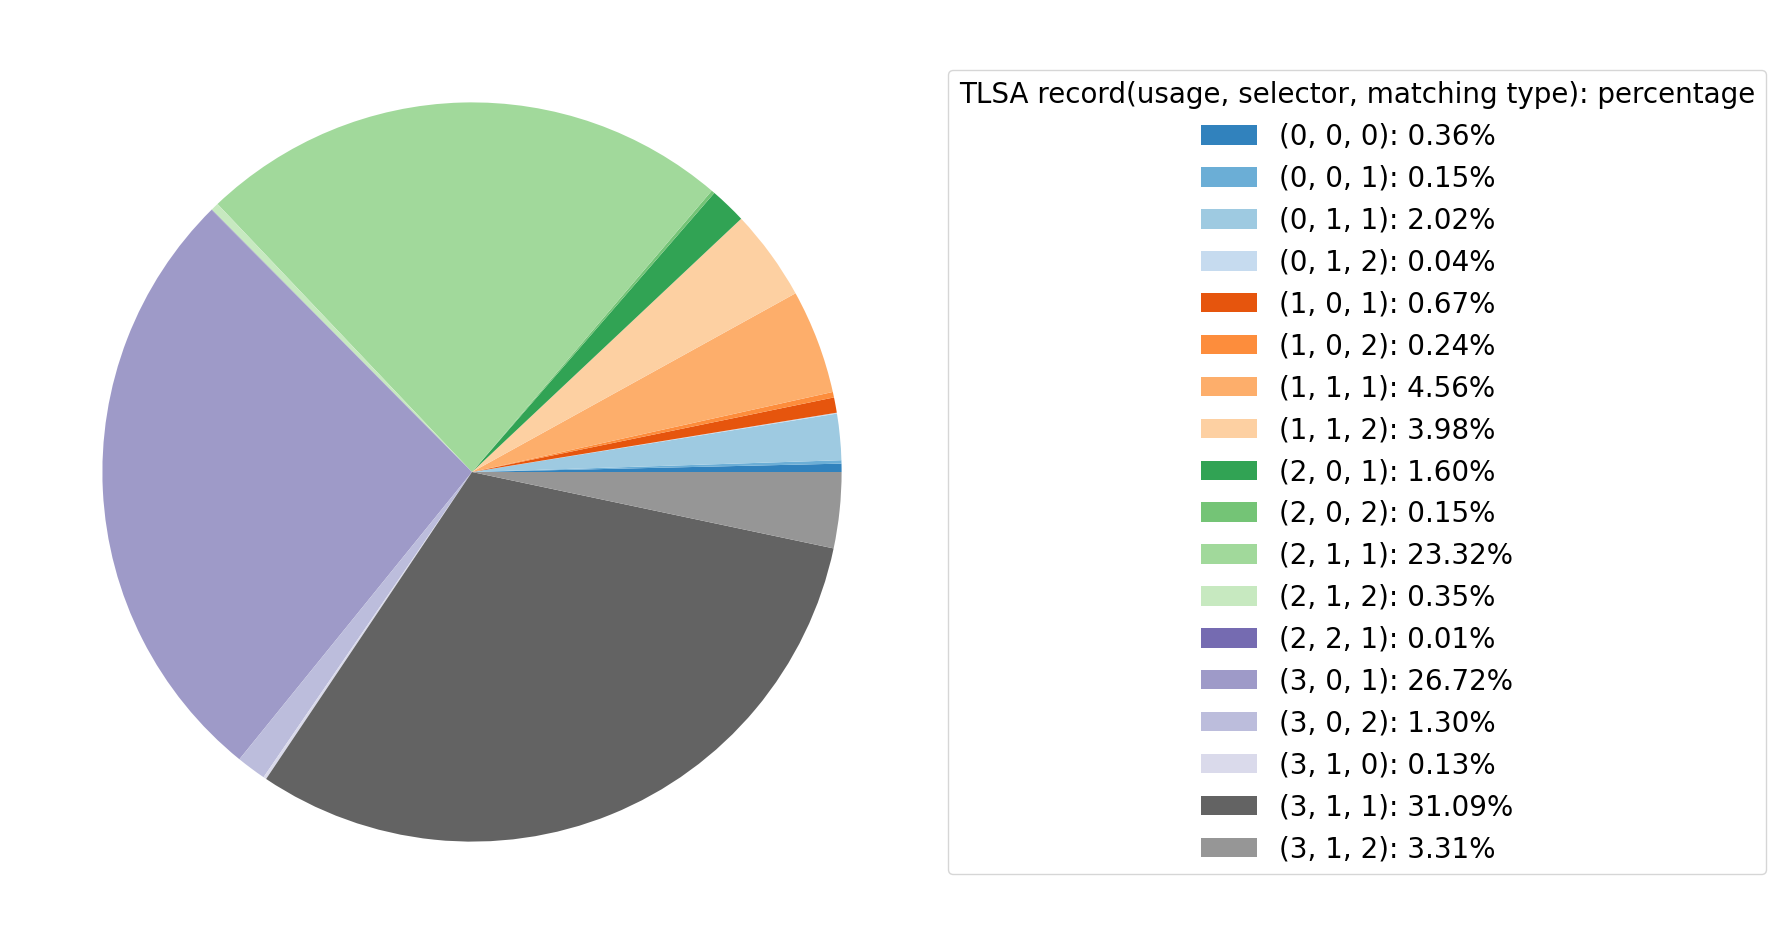

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../hall-of-flame-websites-tlsa.csv')
grouped_data = df.groupby(['usage', 'selector', 'matching_type']).size()

total = grouped_data.sum()
percentages = [(f"{group}: {count/total:.2%}") for group, count in zip(grouped_data.index, grouped_data)]

plt.figure(figsize=(24, 12))
plt.pie(grouped_data, autopct='',colors=plt.cm.tab20c.colors, labels=None)

legend = plt.legend(percentages, title="TLSA record(usage, selector, matching type): percentage", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=20)
plt.setp(legend.get_title(),fontsize=20)
plt.savefig("tlsa_breakdown.pdf", format="pdf", dpi=1000, bbox_inches='tight')

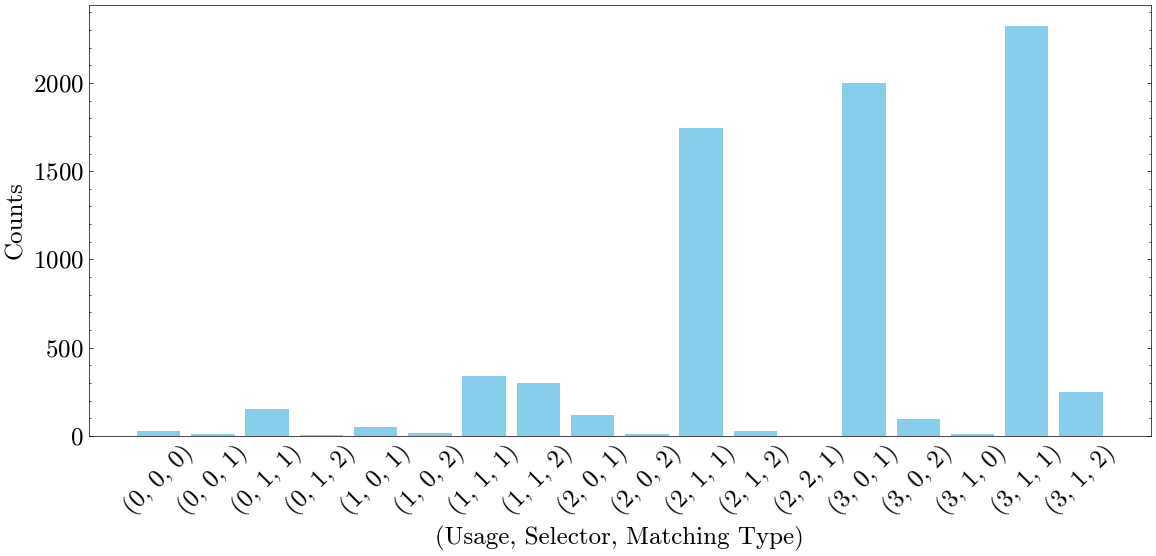

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

df = pd.read_csv('../hall-of-flame-websites-tlsa.csv')
grouped_data = df.groupby(['usage', 'selector', 'matching_type']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.rcParams["font.size"] = 18

plt.style.use(['science','no-latex'])

plt.bar(range(len(grouped_data)), grouped_data['count'], tick_label=grouped_data.apply(lambda x: f"({x['usage']}, {x['selector']}, {x['matching_type']})", axis=1), color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("(Usage, Selector, Matching Type)")
plt.ylabel("Counts")
plt.gca().xaxis.set_ticks_position('none')
plt.tight_layout()
plt.savefig("tlsa_breakdown_bar.pdf", format="pdf", dpi=1000)
plt.show()


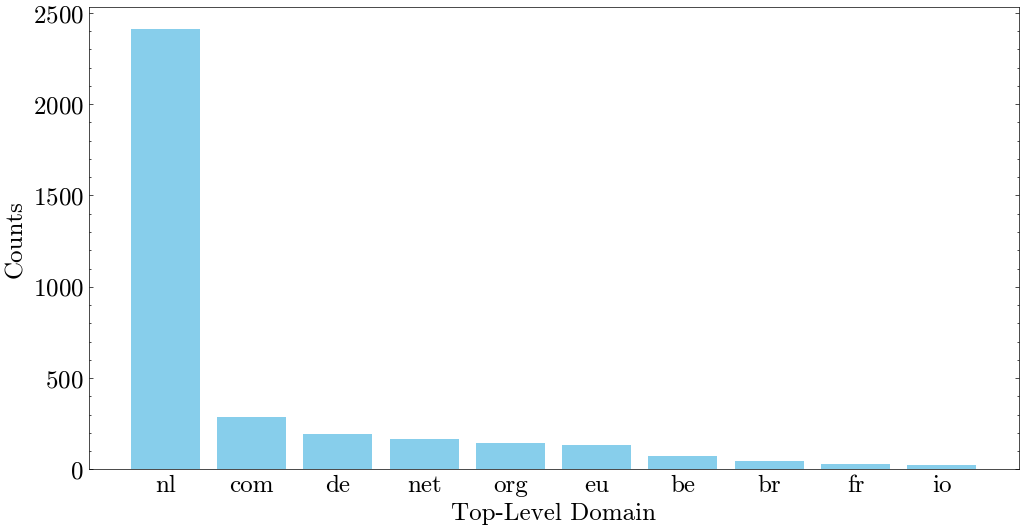

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots

df = pd.read_csv('../hall-of-flame-websites-tlsa-usage3.csv', names=['domain'])

domains = df['domain'].str.split('.').str[-1].value_counts().to_dict()

top_domains = dict(sorted(domains.items(), key=lambda x: x[1], reverse=True)[:10])

plt.style.use(['science','no-latex'])
plt.rcParams["font.size"] = 18
plt.figure(figsize=(12, 6))
plt.bar(top_domains.keys(), top_domains.values(), color='skyblue')
plt.xlabel('Top-Level Domain')
plt.ylabel('Counts')
plt.gca().xaxis.set_ticks_position('none')
# plt.title('Top 10 Most Common Top-Level Domains in DataSet', fontsize='x-large')
plt.savefig("dataset_tlds.pdf", format="pdf",  dpi=1000)
plt.show()